<h1 style="color:green"> MNIST digits classification ________________________ (Project 3) </h1>

<h2 style="color:purple"> Workflow Steps</h2>
<h3 style="color:orange">
    
1. Problem Definition
2. Import Libraries and Dependencies
3. Data Collection
4. Data Preparation
5. Data Visualization 
6. ML & DL Modeling
7. Evaluate & Test Model
8. Predict New Test Data
</h3>


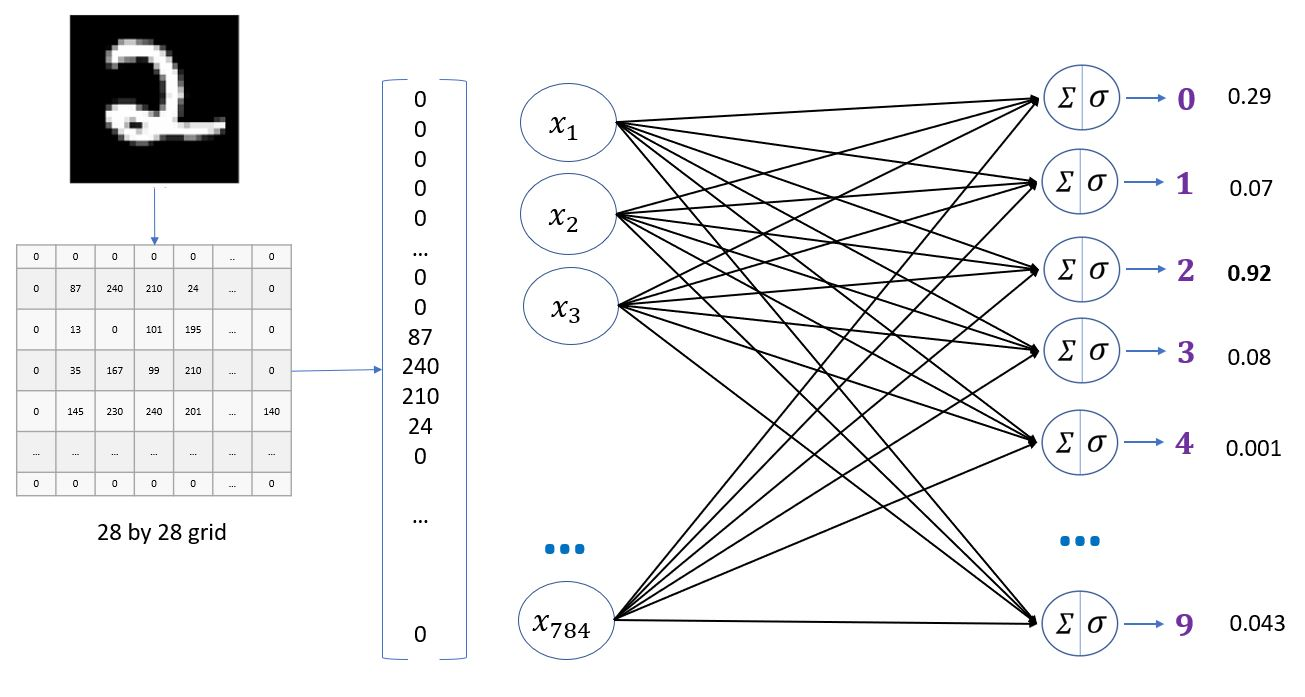

<h2 style="color:blue">1. Problem Definition</h2>

Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
More info can be found at the MNIST homepage.

<h2 style="color:blue">2. Import Libraries and Dependencies</h2>

In [254]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


<h2 style="color:blue">3. Data Collection</h2>

In [255]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

<h2 style="color:blue">4. Data Preparation</h2>

In [256]:
totla_data=len(x_train)+len(x_test)
train_data_ratio=len(x_train)/totla_data
test_data_ratio=len(x_test)/totla_data


print('number of train data :',len(x_train))
print('number of test data  :',len(x_test))
print('total  data number   :',totla_data)

print('train data ratio     :',train_data_ratio)
print('test  data ratio     :',test_data_ratio)
print('train data shape     :',x_train.shape)
print('test  data shape     :',x_test.shape)
print('train data shape     :',y_train.shape)
print('test  data shape     :',x_train.shape)
print('type  of train data  :',type(x_train))

number of train data : 60000
number of test data  : 10000
total  data number   : 70000
train data ratio     : 0.8571428571428571
test  data ratio     : 0.14285714285714285
train data shape     : (60000, 28, 28)
test  data shape     : (10000, 28, 28)
train data shape     : (60000,)
test  data shape     : (60000, 28, 28)
type  of train data  : <class 'numpy.ndarray'>


<h2 style="color:blue">5. Data Visualization </h2>

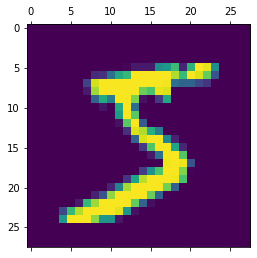

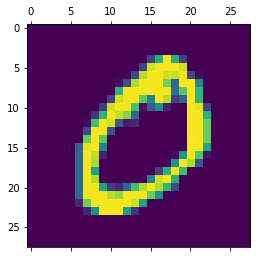

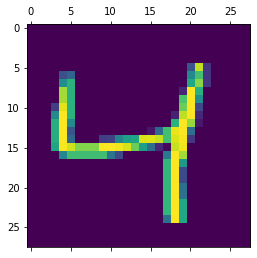

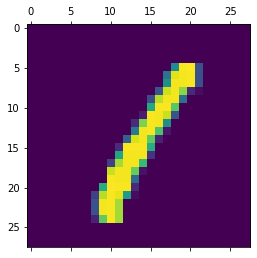

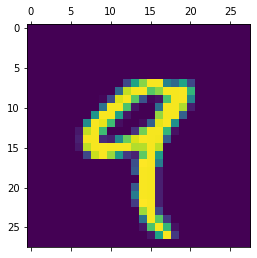

In [257]:
for i in range(5):
    plt.matshow(x_train[i])
    

In [258]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [259]:
# scale the input (train and test) data
x_train=x_train/255
x_test=x_test/255


<h2 style="color:blue">6. ML & DL Modeling</h2>

In [300]:
# using ANN to train the MNIST Datasets

def get_model():
    model=keras.Sequential([
          layers.Flatten(input_shape=(28,28)),
          layers.Dense(3000,activation='relu'),
          layers.Dense(2000,activation='relu'),
          layers.Dense(1000,activation='relu'),
          layers.Dense(500,activation='relu'),
          layers.Dense(10,activation='sigmoid')
        
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                 )
    return model

In [302]:
#%%timeit -n1 -r1 

with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.2392 - accuracy: 0.9335
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1170 - accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0870 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0687 - accuracy: 0.9812
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0585 - accuracy: 0.9847


<h2 style="color:blue">7. Evaluate & Test Model</h2>

In [295]:
cpu_model.evaluate(x_train,y_train)
()

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0018 - accuracy: 0.9994


[0.0018066806951537728, 0.9994333386421204]

In [296]:
cpu_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1657 - accuracy: 0.9781


[0.16568760573863983, 0.9781000018119812]

In [297]:
from sklearn.metrics import confusion_matrix

In [298]:
y_predicted=cpu_model.predict(x_test)
y_predicted=cpu_model.predict(x_test)
result=np.array([np.argmax(i) for i in y_predicted])

cm=confusion_matrix(y_test,result)
cm

array([[ 971,    1,    1,    0,    0,    0,    2,    2,    2,    1],
       [   0, 1124,    3,    1,    0,    1,    1,    1,    4,    0],
       [   4,   11,  994,    2,    4,    0,    3,    8,    5,    1],
       [   0,    0,    5,  995,    0,    1,    0,    3,    5,    1],
       [   4,    2,    3,    1,  957,    1,    3,    1,    1,    9],
       [   3,    0,    0,   40,    1,  837,    1,    1,    7,    2],
       [   6,    3,    3,    1,    5,    9,  926,    0,    5,    0],
       [   3,    3,   11,    4,    0,    1,    0,  996,    3,    7],
       [   1,    1,    1,    5,    6,    2,    0,    4,  953,    1],
       [   2,    2,    1,    1,    5,    3,    1,    4,    4,  986]],
      dtype=int64)

<AxesSubplot:>

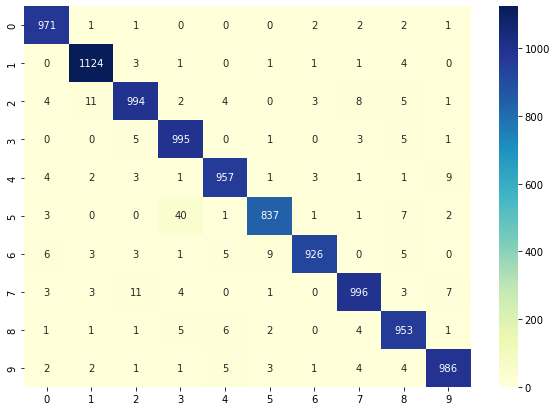

In [299]:
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True ,fmt='d',cmap="YlGnBu")

<h2 style="color:blue">8. Predict New Test Data</h2>

In [213]:
y_predicted=cpu_model.predict(x_test)

In [217]:
result=np.array([np.argmax(i) for i in y_predicted])

In [220]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [221]:
result[:10]

# Perfict ^_^ 

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 4], dtype=int64)